# Super-Resolution Image Processing

# Import Libraries and Functions

In [1]:
import cv2
from super_image import HanModel, ImageLoader
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchsummary import summary


# Define Interpolation Functions

In [2]:
def bicubic_interpolation_cv(image, scale_factor):
    image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    interpolated_np = cv2.resize(image_np, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
    interpolated_image = Image.fromarray(cv2.cvtColor(interpolated_np, cv2.COLOR_BGR2RGB))
    return interpolated_image

def bilinear_interpolation_cv(image, scale_factor):
    image_np = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    interpolated_np = cv2.resize(image_np, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    interpolated_image = Image.fromarray(cv2.cvtColor(interpolated_np, cv2.COLOR_BGR2RGB))
    return interpolated_image


# Load and Preprocess Image

In [3]:
url = 'https://paperswithcode.com/media/datasets/Set5-0000002728-07a9793f_zA3bDjj.jpg'
image = Image.open(requests.get(url, stream=True).raw)


# Interpolate Images

In [4]:
bicubic_result_cv = bicubic_interpolation_cv(image, 2)
bilinear_result_cv = bilinear_interpolation_cv(image, 2)

# Super-Resolution using Han Model

Holistic Attention Network (HAN)

In [5]:
model = HanModel.from_pretrained(r"C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\LabExam\PreTrainedModel", scale=4)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\LabExam\PreTrainedModel\pytorch_model_4x.pt


C:\Users\vickj\anaconda3\Lib\site-packages\super_image\data\loader.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  return torch.as_tensor([lr])


# Save and Plot Results

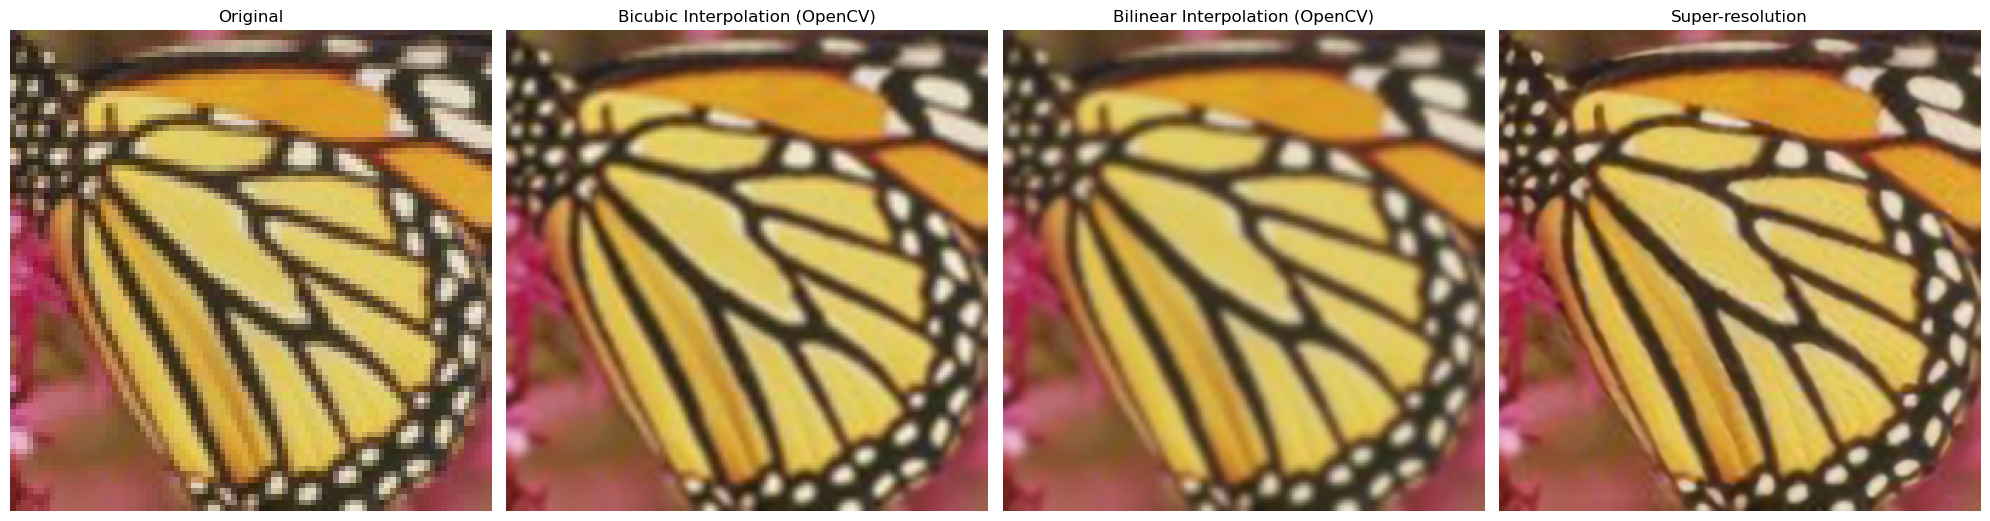

In [6]:
ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(image)
axes[0].set_title('Original')
axes[1].imshow(bicubic_result_cv)
axes[1].set_title('Bicubic Interpolation (OpenCV)')
axes[2].imshow(bilinear_result_cv)
axes[2].set_title('Bilinear Interpolation (OpenCV)')
super_res_image = Image.open('./scaled_2x.png')
axes[3].imshow(super_res_image)
axes[3].set_title('Super-resolution')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()


In [12]:
import numpy as np
from math import log10
from PIL import Image

# Define the function to calculate PSNR
def calculate_psnr(original_image, processed_image):
    # Ensure images are numpy arrays with data type float
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    
    # Resize images to match dimensions
    original_image = np.array(Image.fromarray(original_image.astype(np.uint8)))
    processed_image = np.array(Image.fromarray(processed_image.astype(np.uint8)).resize(original_image.shape[1::-1]))
    
    # Compute MSE (Mean Squared Error)
    mse = np.mean((original_image - processed_image) ** 2)
    
    # Maximum pixel value
    max_pixel = 255.0
    
    # Compute PSNR (Peak Signal-to-Noise Ratio)
    if mse == 0:
        return float('inf')
    psnr = 20 * log10(max_pixel / np.sqrt(mse))
    return psnr

# Calculate PSNR for bicubic and bilinear interpolation
psnr_bicubic = calculate_psnr(np.array(image), np.array(bicubic_result_cv))
psnr_bilinear = calculate_psnr(np.array(image), np.array(bilinear_result_cv))
psnr_super_res = calculate_psnr(np.array(image), np.array(super_res_image))

# Print PSNR values
print("PSNR Bicubic:", psnr_bicubic)
print("PSNR Bilinear:", psnr_bilinear)
print("PSNR Super-resolution:", psnr_super_res)


PSNR Bicubic: 38.989440869328845
PSNR Bilinear: 32.40847293499098
PSNR Super-resolution: 40.22177811971261


In [8]:
model = HanModel.from_pretrained(r"C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\LabExam\PreTrainedModel", scale=4)
print(model)


C:\Users\vickj\Documents\Computer Vision_Sem2_Mtech\LabExam\PreTrainedModel\pytorch_model_4x.pt
HanModel(
  (sub_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (add_mean): MeanShift(3, 3, kernel_size=(1, 1), stride=(1, 1))
  (head): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (body): Sequential(
    (0): ResidualGroup(
      (body): Sequential(
        (0): RCAB(
          (body): Sequential(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): ReLU(inplace=True)
            (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (3): CALayer(
              (avg_pool): AdaptiveAvgPool2d(output_size=1)
              (conv_du): Sequential(
                (0): Conv2d(64, 4, kernel_size=(1, 1), stride=(1, 1))
                (1): ReLU(inplace=True)
                (2): Conv2d(4, 64, kernel_size=(1, 1), stride=(1, 1))
                (3): Sigmoid()
        

# Han Model Summary

In [9]:
import torch
import torch.nn as nn
from torchsummary import summary

def HanModel(scale_factor, num_channels):
    class HanModelImpl(nn.Module):
        def __init__(self):
            super(HanModelImpl, self).__init__()
            # Define your model architecture here
            self.conv1 = nn.Conv2d(in_channels=num_channels, out_channels=128, kernel_size=3, stride=1, padding=1)
            self.relu = nn.ReLU(inplace=True)
            self.conv2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
            self.conv3 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
            self.conv4 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1)
            self.conv5 = nn.Conv2d(in_channels=1024, out_channels=512, kernel_size=3, stride=1, padding=1)
            self.conv6 = nn.Conv2d(in_channels=512, out_channels=num_channels * (scale_factor ** 2), kernel_size=3, stride=1, padding=1)
            self.pixel_shuffle = nn.PixelShuffle(scale_factor)

        def forward(self, x):
            x = self.relu(self.conv1(x))
            x = self.relu(self.conv2(x))
            x = self.relu(self.conv3(x))
            x = self.relu(self.conv4(x))
            x = self.relu(self.conv5(x))
            x = self.pixel_shuffle(self.conv6(x))
            return x

    return HanModelImpl()

# Create an instance of the Han Model
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = HanModel(scale_factor=3, num_channels=1).to(device)

# Specify input size
input_size = (1, 256, 256)  # Assuming grayscale image with size 256x256

# Print model summary
summary(model, input_size=input_size)


C:\Users\vickj\anaconda3\Lib\site-packages\torch\cuda\__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 128, 256, 256]           1,280
              ReLU-2        [-1, 128, 256, 256]               0
            Conv2d-3        [-1, 256, 256, 256]         295,168
              ReLU-4        [-1, 256, 256, 256]               0
            Conv2d-5        [-1, 512, 256, 256]       1,180,160
              ReLU-6        [-1, 512, 256, 256]               0
            Conv2d-7       [-1, 1024, 256, 256]       4,719,616
              ReLU-8       [-1, 1024, 256, 256]               0
            Conv2d-9        [-1, 512, 256, 256]       4,719,104
             ReLU-10        [-1, 512, 256, 256]               0
           Conv2d-11          [-1, 9, 256, 256]          41,481
     PixelShuffle-12          [-1, 1, 768, 768]               0
Total params: 10,956,809
Trainable params: 10,956,809
Non-trainable params: 0
-------------------------